In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.5 MB/s 
     |████████████████████████████████| 5.3 MB 49.7 MB/s 
     |████████████████████████████████| 1.3 MB 46.2 MB/s 
     |████████████████████████████████| 163 kB 62.9 MB/s 
     |████████████████████████████████| 7.6 MB 44.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ba3e23249b573fd45bed7818c23b8a288f11d9bd8220f20de7bf26ad10ea108c
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/610 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/531 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
def save_feather(df, path="dummy.feather"):
    df = df.reset_index()
    df.to_feather(path)


def load_feather(path="dummy.feather"):
    df = pd.read_feather(path)
    df.set_index("index", inplace=True)
    df.index.name = None
    return df

In [6]:
%%time
df_vec_distiluse = load_feather('/content/drive/MyDrive/123/df_vec_distiluse.feather')

CPU times: user 2.52 s, sys: 4.14 s, total: 6.66 s
Wall time: 32.9 s


In [7]:
df_vec_distiluse

,name_1,name_2,is_duplicate,name_1_vec,name_2_vec
1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,"[[-0.018349426, -0.009051995, 0.023317082, 0.0...","[[-0.018555623, -0.056781758, 0.013937416, -0...."
2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,"[[-0.019763006, -0.024556736, 0.034616992, 0.0...","[[-0.06599076, 0.04381172, -0.0021011548, -0.0..."
3,"Rishichem Distributors Pvt., Ltd.",Dsa,0,"[[-0.048539482, -0.0022187221, 0.024864022, -0...","[[0.032309864, 0.015820276, -0.039863262, -0.0..."
4,Powermax Rubber Factory,Co. One,0,"[[-0.025008578, 0.012964974, -0.02207313, 0.01...","[[0.0013258784, -0.087760255, -0.013663781, -0..."
5,Tress A/S,Longyou Industries Park Zhejiang,0,"[[0.02590205, -0.0028495532, -0.013994671, -0....","[[0.039059974, 0.11018376, -0.069087744, -0.02..."
...,...,...,...,...,...
497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,"[[0.005421836, -0.017194286, 0.011926081, 0.02...","[[-0.04085151, -0.02597898, 0.050399017, 5.372..."
497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,"[[-0.03648974, -0.061221067, 0.051907174, -0.0...","[[-0.042807538, 0.0029897436, -0.0071123242, -..."
497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,"[[-0.060747653, -0.014529315, 0.020959366, -0....","[[-0.027352586, 0.012049336, 0.032026246, -0.0..."
497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,"[[-0.020418914, 0.0052782106, -0.00719729, -0....","[[0.025248379, 0.026609672, -0.013587759, -0.0..."


In [8]:
df_vec_distiluse.shape[0]

497819

In [9]:
res_list = []
for index in tqdm(range(df_vec_distiluse.shape[0])):
    res_list.append(cosine_similarity(df_vec_distiluse['name_1_vec'].iloc[index][0].reshape(1, -1), df_vec_distiluse['name_2_vec'].iloc[index][0].reshape(1, -1)))

100%|██████████| 497819/497819 [02:30<00:00, 3316.28it/s]


In [10]:
df_vec_distiluse['cosine_similarity'] = res_list

In [11]:
len(res_list)

497819

In [12]:
np.mean(res_list)

0.36735153

In [13]:
df_vec_distiluse[df_vec_distiluse['is_duplicate']==1]['cosine_similarity'].mean()

array([[0.5582281]], dtype=float32)

In [14]:
df_vec_distiluse[df_vec_distiluse['is_duplicate']==0]['cosine_similarity'].mean()

array([[0.36593503]], dtype=float32)

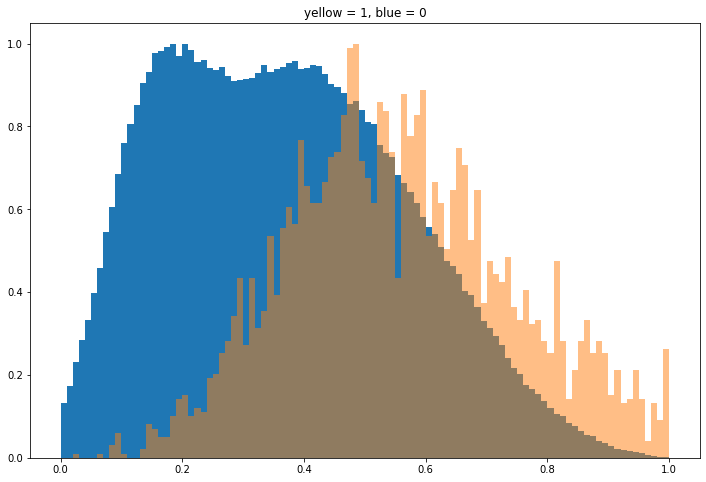

In [15]:
dist1 = df_vec_distiluse[df_vec_distiluse['is_duplicate']==0]['cosine_similarity']
dist2 = df_vec_distiluse[df_vec_distiluse['is_duplicate']==1]['cosine_similarity']

##computing the bin properties (same for both distributions)
num_bin = 100
bin_lims = np.linspace(0, 1, num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(dist1, bins=bin_lims)
hist2, _ = np.histogram(dist2, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

fig, (ax) = plt.subplots()
fig.set_size_inches(12, 8)

ax.bar(bin_centers, hist1b, width = bin_widths, align = 'center')
ax.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.5)
ax.set_title('yellow = 1, blue = 0')

plt.show()